GitHub [link](https://github.com/breemclennan/SIT799/blob/main/Task1_3C_Classification_Using_FFNN.ipynb)

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [1]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

if you are using GoogleColab, please install the following packages and mount your Google drive:

In [2]:
 !apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended  2> /dev/null  > /dev/null 
 !apt-get install pandoc 2> /dev/null  > /dev/null 

#Use google drive as the data repository
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run the following cell to load the packages you will need.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential #for defining the model
from keras.layers import Dense      #for defining the model

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [4]:
#df = pd.read_csv('data.csv') #Commented out as using Google Colab and Google Drive repository
df = pd.read_csv('/content/drive/MyDrive/Uni Assignments/SIT799 Human Aligned AI/data.csv')
df.set_index('id', inplace=True)

In [5]:
#observe the data
df.head(n=20)

#The columnn named 'label' is the target class. 
#It contains binary values. This modeling task will be a binary classification problem.
#Confirmed, there are 512 features each with continuous numeric values.

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,0.47676,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,-0.36710,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,-0.64555,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,-0.27174,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,0.50747,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0
6,-0.46177,-0.29613,0.61101,-1.00880,0.29751,-1.08969,-0.85424,-0.13436,-1.53843,-0.75731,-0.34578,-0.61463,-0.45296,-0.94544,0.99837,0.52330,-0.96145,0.34110,

Now, let's split the data into training and test sets.

In [7]:
#Dataset split configuration 85% train 15% test
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:
X_train = df[df['data_type']=='train'].iloc[:,:512].values #input features
X_test = df[df['data_type']=='test'].iloc[:,:512].values   #input features
y_train = df[df['data_type']=='train'].iloc[:,512:513].values #input target
y_test = df[df['data_type']=='test'].iloc[:,512:513].values   #input target

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [10]:
# START YOUR CODE HERE
#========================================================================#

#REF: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

# Manually define and calculate the metrics for a Keras model. 
#These will be included in the model compilation process.
# Reference: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#REF: Jason Brownlee, Machine Learning Mastery, 2020: 
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Constructing a fully connected network with three layers. 
#The fully connected layers are defined using the 'Dense()' class.
# ReLU: Rectified Linear Unit activation function. 

model = Sequential()
#Input layer 1, first hidden layer has 100 nodes. ReLU offers better performance here. input_dim defines the shape of the input.
model.add(Dense(100, input_dim=512, activation='relu')) 
#Input layer 2, second hidden layer has 50 nodes. ReLU offers better performance here
model.add(Dense(50, activation ='relu')) 
#Output layer, with one node. Sigmoid is used here to ensure the network output is between 0 and 1.

model.add(Dense(1, activation='sigmoid')) 
#Compile the Keras model
#Find the best set of weights to map inputs to outputs from the given dataset.
#A loss function must be defined to evaluate the weights, 
#the optimizer searches through the weights for the network and 
#any other metrics to collect during training (i.e accuracy, F1-score, precision, recall)
#loss function "binary crossentropy" will compute cross-entropy loss between true and predicted target classes
#optimizer "adam" uses the Adam Algorithm which is a version of gradient descent
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Training

Now, let's start our training.

In [11]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1) 
#parameter validation_split=0.3 could also be included here.

Epoch 1/200
60/60 [==============================] - 3s 3ms/step - loss: 0.4937 - accuracy: 0.7408 - f1_m: 0.8077 - precision_m: 0.7578 - recall_m: 0.8939
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9972 - f1_m: 0.9977 - precision_m: 0.9970 - recall_m: 0.9985
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - los

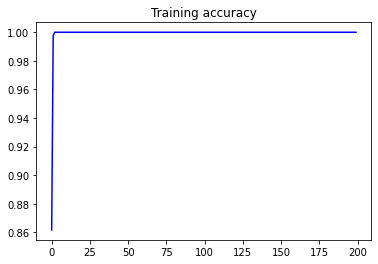

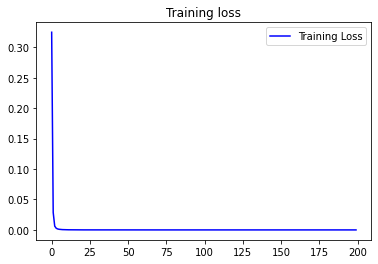

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

In [13]:
# START YOUR CODE HERE

# Evaluate the Keras model.
# The evaluate() function will return a list of five values [0] loss, [1] accuracy, [2] F1-Score, [3] precision, [4] recall
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

print("Performance Results from Test Set")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1-Score: " + str(f1_score))
print("Accuracy: " + str(accuracy))

#Ideal results would be "loss" as close to zero as possible. "accuracy" as close to 1 as possible.
# Minimise loss and maximise accuracy.

22/22 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9970 - f1_m: 0.9973 - precision_m: 0.9949 - recall_m: 1.0000 
Performance Results from Test Set
Precision: 0.9949495196342468
Recall: 1.0
F1-Score: 0.9973262548446655
Accuracy: 0.9970370531082153


In [14]:
# make class predictions with the model
predictions = np.argmax(model.predict(X_test), axis=-1)
# summarize the first 5 cases
print("Prediction Summaries using Test Set - First 5 records")
for i in range(5):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

Prediction Summaries using Test Set - First 5 records
[1.3494899999999999, -0.31498000000000004, -1.3024799999999999, 0.50278, 1.6629200000000002, -1.06094, -0.70835, -0.24236999999999997, -0.15509, -0.04532, 0.97349, -0.21031999999999998, -0.71143, 0.59725, -0.51849, 0.00126, 1.2221899999999999, 0.5716, 0.41212, 0.9007700000000001, -0.80797, -1.20564, 1.40774, 0.4908, -1.05429, 0.263, -0.038489999999999996, -0.66792, -0.2926, 0.47713, 0.44966999999999996, 0.44411000000000006, -0.13465, -0.20365, 0.52841, -0.47348, 0.39295, 0.67695, 0.40861, -0.27174, -0.293, -0.84736, -0.77912, 0.49243000000000003, -1.20856, -0.52951, -1.23407, 1.04745, -0.5141899999999999, -0.80816, 1.7886099999999998, 0.17318, 0.72663, -0.22455999999999998, -0.62232, -0.04338, 1.20983, -0.16165, 0.21622, 1.21289, -1.0457100000000001, -1.16898, -0.13027, -0.9256700000000001, 0.03106, -0.32682, -0.23221999999999998, 1.05, -1.25865, -1.0420200000000002, -0.5625899999999999, 0.28905, 1.62015, -1.34866, -0.67648999999999

Export your notebook to a pdf document

In [ ]:
#!jupyter nbconvert --to pdf 'YOUR_LINK_TO_THE_IPYNOTE_NOTEBOOK'

# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

